In [13]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()


 Derivative-Free Optimization for Least-Squares (DFO-LS) is a
 nonlinear least-squares solver that only requires function values.

 Documentation
 [https://numericalalgorithmsgroup.github.io/dfols/build/html/index.html](https://numericalalgorithmsgroup.github.io/dfols/build/html/index.html)

 Repository
 [https://github.com/numericalalgorithmsgroup/dfols](https://github.com/numericalalgorithmsgroup/dfols)

 Install using either:
 `conda install -c conda-forge dfo-ls`
 `pip install DFO-LS`

In [14]:
from dfols import solve


In [15]:
# project files
os.environ.setdefault("RP_MODEL_FILE_PATH", "../files")

from rp_model.utils import pack, table, load, digest
from rp_model.calc import FitOptions, RoundApprox, compute_rp, make_precomputed_columns, make_initial_guess

In [16]:
# stuff for display

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# progress bar

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 120)

In [17]:
data = pd.read_pickle(FitOptions.data_file)
data.describe()
data.head()

,Level,RP,MS lvl,ModelRP,Difference,Freq1,FreqL,Inv,Berry1,BerryL,Ing1P,Helps per hour,Helps Neutral,NrgMult,IngrMult,SkillMult,Ingr%,SklContr,BerryD,IngD,Dupes,Amnt,Ing2P,Help skill bonus,RP Multiplier
count,8787.000000,8787.00000,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.000000,8787.0,8787.000000,8787.000000,8787.000000,8787.000000
mean,12.395698,695.38079,1.596449,695.340958,-0.039832,3828.064186,3657.953618,12.684534,28.062706,39.696825,108.746102,1.069347,0.987252,0.994155,0.998794,1.007784,0.208745,36.137822,59.160464,150.109195,1.0,0.147832,6.356436,0.984036,1.033762
std,8.331491,484.76049,1.077205,484.769106,0.663172,989.486008,1058.222871,3.626789,2.616258,9.588010,16.052627,0.329581,0.058245,0.044961,0.119004,0.119348,0.046446,41.313861,31.365461,65.009024,0.0,0.707426,29.638081,0.042410,0.075987
min,1.000000,245.00000,1.000000,245.000000,-17.000000,2200.000000,1489.118400,7.000000,24.000000,24.000000,90.000000,0.520000,0.890000,0.920000,0.800000,0.800000,0.130000,5.940000,25.000000,90.000000,1.0,0.000000,0.000000,0.790000,1.000000
25%,6.000000,371.00000,1.000000,371.000000,0.000000,3000.000000,2760.800000,10.000000,26.000000,33.000000,98.000000,0.820000,1.000000,1.000000,1.000000,1.000000,0.180000,14.050000,37.000000,101.000000,1.0,0.000000,0.000000,1.000000,1.000000
50%,10.000000,525.00000,1.000000,525.000000,0.000000,3800.000000,3618.600000,12.000000,28.000000,37.000000,103.000000,0.990000,1.000000,1.000000,1.000000,1.000000,0.210000,20.750000,50.000000,121.000000,1.0,0.000000,0.000000,1.000000,1.000000
75%,16.000000,815.00000,2.000000,815.000000,0.000000,4500.000000,4374.720000,15.000000,31.000000,44.000000,115.000000,1.300000,1.000000,1.000000,1.000000,1.000000,0.230000,47.800000,72.000000,202.000000,1.0,0.000000,0.000000,1.000000,1.000000
max,50.000000,5217.00000,6.000000,5220.000000,9.000000,6300.000000,6916.140000,24.000000,35.000000,107.000000,151.000000,2.410000,1.120000,1.080000,1.200000,1.200000,0.430000,414.490000,321.000000,511.000000,1.0,8.000000,342.000000,1.000000,1.440000


,Pokemon,Level,RP,Nature,MS lvl,Source,ModelRP,Difference,Nature2,ID,NatureP,NatureN,Freq1,FreqL,Type,Class,MSkill,Inv,Berry1,BerryL,Ing1,Ing1P,Helps per hour,Helps Neutral,NrgMult,IngrMult,SkillMult,Ingr%,SklContr,RPneutral,IDNeutral,BerryD,IngD,Dupes,DupeMatch,Sub Skill 1,Sub Skill 2,Ingredient 2,Amnt,Ing2P,Help skill bonus,RP Multiplier,Sub Skill 3
0,Arbok,8.0,531.0,Hardy,1.0,Questions help guides,531.0,0.0,Neutral,ArbokNeutral81,-,-,3700.0,3648.20,Poison,Berries,Charge Energy S,14.0,32.0,39,Bean Sausage,103.0,0.98,1.0,1.00,1.0,1.0,0.26,22.75,531.00,ArbokNeutral81,78.0,103.0,1,True,,,,0.0,0.0,1.0,1.0,
1,Arbok,8.0,538.0,Quiet,1.0,Questions help guides,538.0,0.0,Quiet,ArbokQuiet81,Ingredient Finding,Exp Gains,3700.0,3648.20,Poison,Berries,Charge Energy S,14.0,32.0,39,Bean Sausage,103.0,0.98,1.0,1.00,1.2,1.0,0.26,22.75,530.61,ArbokNeutral81,78.0,103.0,1,True,,,,0.0,0.0,1.0,1.0,
2,Arbok,9.0,528.0,Bold,1.0,,528.0,0.0,Bold,ArbokBold91,Energy Recovery,Speed of Help,3700.0,4004.88,Poison,Berries,Charge Energy S,14.0,32.0,40,Bean Sausage,103.0,0.89,1.1,1.08,1.0,1.0,0.26,22.75,538.33,ArbokNeutral91,80.0,103.0,1,True,,,,0.0,0.0,1.0,1.0,
3,Arbok,9.0,539.0,Hardy,1.0,Double Jumper,539.0,0.0,Neutral,ArbokNeutral91,-,-,3700.0,3640.80,Poison,Berries,Charge Energy S,14.0,32.0,40,Bean Sausage,103.0,0.98,1.0,1.00,1.0,1.0,0.26,22.75,539.00,ArbokNeutral91,80.0,103.0,1,True,,,,0.0,0.0,1.0,1.0,
4,Arbok,9.0,574.0,Naughty,1.0,Rate My Mon,574.0,0.0,Naughty,ArbokNaughty91,Speed of Help,Main Skill Chance,3700.0,3276.72,Poison,Berries,Charge Energy S,14.0,32.0,40,Bean Sausage,103.0,1.09,0.9,1.00,1.0,0.8,0.26,22.75,538.35,ArbokNeutral91,80.0,103.0,1,True,,,,0.0,0.0,1.0,1.0,


In [6]:
# Use exact rounding for this worksheet

FitOptions.rounding.final_rp = RoundApprox.Exact
FitOptions.rounding.bonus = RoundApprox.Exact
FitOptions.rounding.period = RoundApprox.Exact
FitOptions.rounding.components = RoundApprox.Pass

#FitOptions.rounding.period = RoundApprox.Pass
#FitOptions.rounding.components = RoundApprox.Pass




In [7]:
# Make an initial guess
# Pack the dictionary into a 1-D vector.
# Also store information on how to unpack that vector

x0, unpack_info = pack(*make_initial_guess())
computed = make_precomputed_columns(data)

In [8]:
# We compute the RP model in rp_model.py
# Here we create closure to glue the pieces together.

def RP(x):
    return compute_rp(x, data, computed, unpack_info)


# for the error analysis page,
# we'll compute the residual with exact rounding.

def residual(x):
    return data["RP"] - np.round(RP(x))


In [9]:
filename = FitOptions.get_result_file(digest(data, x0))
opt = load(filename)
opt

    message: `ftol` termination condition is satisfied.
    success: True
     status: 2
          x: [ 5.614e-01  5.442e-01 ...  3.641e-01  3.695e-01]
       cost: 1603.5023071734222
       grad: [-1.899e-05 -2.721e-05 ...  0.000e+00  0.000e+00]
 optimality: 0.03646952503913781
       nfev: 20
       njev: 10

In [10]:

#FitOptions.soft_round.alpha = 18

optx = opt.x
#choice_list = [0.5*optx, 1.5*optx]
#bounds_low =  np.select([optx>=0, optx<0], choice_list)
#bounds_high = np.select([optx<0, optx>=0], choice_list)
#result = solve(residual, optx, bounds=( bounds_low, bounds_high ), scaling_within_bounds=True, print_progress=True, maxfun=2200)

result = solve(residual, optx, print_progress=True, maxfun=2200)


 Run  Iter     Obj       Grad     Delta      rho     Evals 
  1     1    2.59e+03  1.52e+05  2.00e-01  2.00e-01   260  
  1     2    2.59e+03  1.52e+05  1.00e-01  2.00e-02   260  
  1     3    2.59e+03  1.52e+05  5.00e-02  2.00e-02   262  
  1     4    2.59e+03  1.54e+05  2.00e-02  2.00e-02   264  
  1     5    2.59e+03  1.56e+05  2.00e-02  2.00e-02   266  
  1     6    2.59e+03  1.56e+05  2.00e-02  2.00e-02   268  
  1     7    2.59e+03  1.61e+05  2.00e-02  2.00e-02   270  
  1     8    2.59e+03  1.61e+05  2.00e-02  2.00e-02   272  
  1     9    2.59e+03  1.64e+05  2.00e-02  2.00e-02   274  
  1    10    2.59e+03  1.60e+05  2.00e-02  2.00e-02   276  
  1    11    2.59e+03  1.61e+05  2.00e-02  2.00e-02   278  
  1    12    2.59e+03  1.62e+05  2.00e-02  2.00e-02   280  
  1    13    2.59e+03  1.61e+05  2.00e-02  2.00e-02   282  
  1    14    2.59e+03  1.63e+05  2.00e-02  2.00e-02   284  
  1    15    2.59e+03  1.63e+05  1.00e-02  2.00e-03   285  
  1    16    2.59e+03  1.64e+05  5.00e-0

In [11]:
table(result)

EXIT_FALSE_SUCCESS_WARNING,3
EXIT_INPUT_ERROR,-1
EXIT_LINALG_ERROR,-3
EXIT_MAXFUN_WARNING,1
EXIT_SLOW_WARNING,2
EXIT_SUCCESS,0
EXIT_TR_INCREASE_ERROR,-2
diagnostic_info,None
f,2521.0
flag,0
jacobian,[[-0.00000000e+00 -0.00000000e+00 0.00000000e+00 ... -0.00000000e+00 0.00000000e+00 -0.00000000e+00] [-0.00000000e+00 -0.00000000e+00 0.00000000e+00 ... -0.00000000e+00 0.00000000e+00 -0.00000000e+00] [-0.00000000e+00 -0.00000000e+00 0.00000000e+00 ... -0.00000000e+00 0.00000000e+00 -0.00000000e+00] ... [-2.18640066e-06 -4.54625945e-06 1.24137933e-06 ... 6.96581257e-06 7.40144447e-06 -8.24137555e-07] [-1.42422033e-06 -2.99198608e-06 8.32186020e-07 ... 4.58075881e-06 4.81093568e-06 -5.99372767e-07] [-7.12110166e-07 -1.49599304e-06 4.16093010e-07 ... 2.29037941e-06 2.40546784e-06 -2.99686383e-07]]


count    8787.000000
mean       -0.009218
std         0.535583
min        -9.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        16.000000
Name: RP, dtype: float64

IndexError: list index out of range

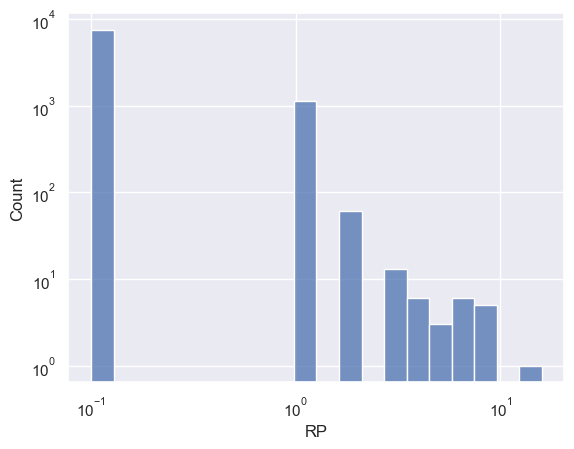

In [12]:
r_opt = data["RP"] - np.round(RP(result.x))
pd.Series(r_opt).describe()

_ = plt.figure()
g = sns.histplot(x=np.clip(np.abs(r_opt), 1e-1, 1e3), log_scale=True, bins=20)
g.axes.set_yscale('log')
_ = g.bar_label(g.containers[1], labels=[str(v) if v else '' for v in g.containers[1].datavalues])

_ = plt.figure()
g = sns.histplot(x=r_opt, discrete=1)
_ = g.axes.set_yscale('log')
_ = g.bar_label(g.containers[1], labels=[str(v) if v else '' for v in g.containers[1].datavalues])

In [ ]:

# What are the worst points?

df = data[["Pokemon", "ID", "Level", "MS lvl", "NatureP", "NatureN", "Sub Skill 1", "Sub Skill 2", "RP"]].copy()

df["fit"] = RP(result.x)
df["error"] = data["RP"] - np.round(RP(result.x))
df["error2"] = df["error"] ** 2

df = df.sort_values("error2", ascending=False).reset_index(drop=True)
df.head(100)